## Lab 4: Blackbody Radiation and the Stefan-Boltzmann Law
### New Python Features

This notebook discusses several of the new things you'll need to do in Lab 4: read in a data file, interpolate between measured data points, and use a log-log plot to "eyeball" data that can be described by a *power law model*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.interpolate import interp1d

### Reading in a data file

As described in the lab handout, the easiest way to do this is with the `np.loadtxt()` function:

```python
data = np.loadtxt('path_to_my_file.txt')
```

To be clear, here you are assigning the output of `np.loadtxt()` (which is an array) to the variable `data`.

For the purposes of this lab, this should be sufficient. You might want to look at the `np.loadtxt()` documentation for additional options. One option that can be useful is if you need to skip a row. Perhaps you prepared a text file of data, `myfile.txt`, that looks like

```
Voltage (V)     Current (mA)
0.05    0.5
0.10    1.0
0.15    1.5
```

and so on. Here there's no numerical data in the first line, which just contains labels. In that case, you can use the `skiprows` optional argument to skip the first line:

```python
data = np.loadtxt('myfile.txt', skiprows = 1)
```


### Interpolation

Often it's the case that you have experimentally measured data at a set of points but need to values that are between the measured values. In lab, this came up with the data for the resistivity of tungsten $\rho(T)$, where you only know the resistivity $\rho$ at certain temperatures $T$.

Suppose you had an array `your_normalized_resistivities` containing normalized resistivities for tungsten and another array `your_temperatures` containing the temperature. Then,

```python
func = interp1d(your_normalized_resistivities, your_temperatures)
```

will create a function `func` that you can now call. If I want to know what the temperature is that corresponds to a normalized resistance of 2.7, for instance, I can get that from

```python
func(2.7)
```

This function `func` also accepts array arguments, so you can call it with an array of your normalized resistance values as in the handout.

The handout suggests using an optional keyword argument, `kind`:

```python
func = interp1d(your_normalized_resistivities, your_temperatures, kind = 'cubic')
```

This will join the measured data points with a set of smoothly connected cubic polynomials (called cubic splines.) The default option (if you don't specify the `kind` keyword argument) is just to join the measured data points with straight lines (equivalent to specifying `kind = 'linear'`). As you might imagine, the cubic spline interpolation is usually smoother, which is why it is suggested.

#### Extra information: extrapolating data

There is one good reason, under certain circumstances, not to use cubic spline interpolation: you might need to *extrapolate* outside the range of your measured data. The smallest value in `your_normalized_resistivities` was 1.0. If you try to call func with a value less than 1, 

```python
func(0.5)
```

you will get an error message ending with

```
ValueError: A value in x_new is below the interpolation range.
```

Outside the range of your measured data, the interpolated function doesn't know what to do. You can get around this by specifying the `fill_value` keyword argument and linear interpolation (with `kind = linear`):

```python
func2 = interp1d(your_normalized_resistivities, your_temperatures,
                 kind = 'linear', fill_value = 'extrapolate')
```

Critically, extrapolation does *not* work with cubic spline interpolation.

### Using log-log plots to eyeball a power law

Often we might have data that we expect to follow a power law, as in the case of our radiated power vs. temperature measurements. You can certainly do a linear plot of the natural log:

```python
plt.plot(np.log(your_xdata), np.log(your_ydata))
```

but here is an alternate approach you may use.

First I'm going to make up some data to use for demonstration purposes:

In [2]:
fake_xdata = np.linspace(0.1, 1000, 100)
arbitrary_multiplicative_constant = 1.9
power_law_exponent = 4
fake_ydata = arbitrary_multiplicative_constant * fake_xdata**power_law_exponent

Here's a linear plot of the natural log:

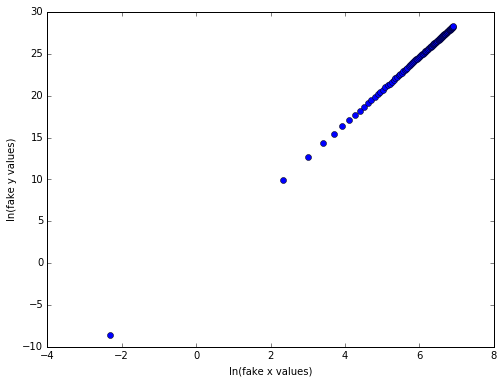

In [3]:
plt.figure(figsize = (8,6)) # make the plot bigger
plt.plot(np.log(fake_xdata), np.log(fake_ydata), 'bo')
plt.xlabel('ln(fake x values)')
plt.ylabel('ln(fake y values)')

Clearly, the fake data now look linear. Notice that the slope is 4: the line goes up 4 units in the ordinate for every unit in the abscissa. But there is a disadvantage in that I can't calculate powers of $e$ in my head, so it's hard to tell what value the data point around $x = -2$ actually has. Using base 10 logarithms makes it a little better:

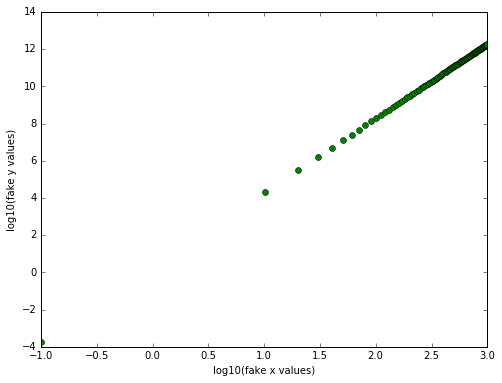

In [4]:
plt.figure(figsize = (8,6)) # make the plot bigger
plt.plot(np.log10(fake_xdata), np.log10(fake_ydata), 'go')
plt.xlabel('log10(fake x values)')
plt.ylabel('log10(fake y values)')

What is a little easier to read, however, is a plot on log-log scales:

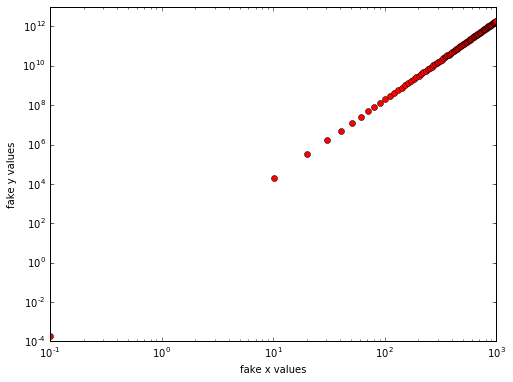

In [5]:
plt.figure(figsize = (8,6)) # make the plot bigger
plt.loglog(fake_xdata, fake_ydata, 'ro')
plt.xlabel('fake x values')
plt.ylabel('fake y values')

Now I can directly read off the values of any point. Notice also how the slope is still 4 in terms of powers of 10.

A handy trick is to *plot* an extra line of known slope on your log-log plot as a guide to the eye. Here, for instance, suppose that I expect my fake data to obey the power law

$$ y = A x^4$$

where $A$ is a constant:

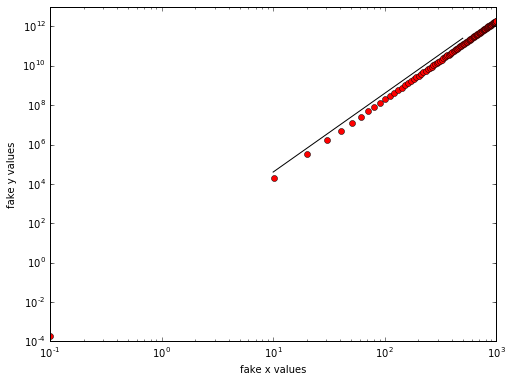

In [6]:
plt.figure(figsize = (8,6)) # make the plot bigger
plt.loglog(fake_xdata, fake_ydata, 'ro')
plt.xlabel('fake x values')
plt.ylabel('fake y values')

extra_xvalues = np.linspace(10, 500, 50)
plt.loglog(extra_xvalues, 4 * extra_xvalues**4, 'k') # plot guide for eye as solid black line

I arbitrarily picked the value of 4 in front of `extra_xvalues**4` to raise the black line slightly above the data points. It's now pretty obvious that the "data" have a $x^4$ dependence.